In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
# os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
import numpy as np
import pandas as pd
from zipfile import ZipFile
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Keras input and dense layers

## Course outline
* Chapter 1: Introduction to the Keras functional API (Refresher)
* Chapter 2: Models with 2 inputs
* Chapter 3: Models with 3 inputs
* Chapter 4: Multiple outputs

## Course Datasets: College basketball data, 1989-2017
* Dataset 1: Regular season
    * Team ID 1
    * Team ID 2
    * Home vs Away
    * Score Difference (Team 1 - Team 2)
    * Team 1 Score
    * Team 2 Score
    * Won vs Lost
* Dataset 2: Tournament games
    * Same as Dataset 1
    * Also has difference in seed

In [2]:
! unzip -l basketball_data.zip

Archive:  basketball_data.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   204355  2018-11-28 22:14   games_season_enriched.csv
  8749326  2018-11-28 03:34   games_season.csv
   130328  2018-11-28 03:34   games_tourney.csv
---------                     -------
  9084009                     3 files


In [3]:
zip_file = ZipFile('basketball_data.zip')
games_season_enriched, games_season, games_tourney = \
[pd.read_csv(zip_file.open(text_file.filename))
 for text_file in zip_file.infolist()
 if text_file.filename.endswith('.csv')]

games_season_enriched.shape, games_season.shape, games_tourney.shape

((4234, 10), (312178, 8), (4234, 9))

The first dataset is from the regular season and has the following data: the IDs of the 2 teams that played, whether the first team was home or away, whether the first team won or lost the game, and by how many points the first team won or lost. 

In [4]:
games_season.sort_values(['season', 'team_1', 'team_2']).head()

,season,team_1,team_2,home,score_diff,score_1,score_2,won
407,1985,5,213,1,29,85,56,1
157160,1985,5,908,1,-10,59,69,0
3563,1985,5,1047,0,3,82,79,1
157765,1985,5,1047,1,-7,72,79,0
158980,1985,5,1047,0,-10,61,71,0


For the tournament dataset, you also have the tournament "seed", which is a pre-tournament ranking for each team. These seeds range from 1 to 16, where the best 4 teams get a seed of 1, and the worst 4 teams get a seed of 16. You will use the difference in the two team's seeds as an input to your model. 

In [5]:
games_tourney.sort_values(['season', 'team_1', 'team_2']).head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
3,1985,73,288,0,3,9,50,41,1
68,1985,73,5929,0,-4,-6,55,61,0
115,1985,73,9884,0,-5,4,63,59,1
0,1985,288,73,0,-3,-9,41,50,0
35,1985,410,3920,0,-1,9,63,54,1


Other than the seed difference, the two datasets have identical columns.

Within a given year, a team's roster stays relatively constant, but between years it can change a lot, as seniors graduate, and freshmen start.

Therefore, for every year, each school is given a unique integer ID. 

## Inputs and outputs
Two fundamental parts:
* Input layer
* Output layer

## Inputs

To start, I'll define a very simple keras model, which only expects a single input. I specify this using the Input() function from the tensorflow.keras.layers module. The number of columns in the input is specified using the shape parameter. This tells the model how much data to expect. Note that the shape argument expects a tuple.

The Input function returns a "tensor". If you print this tensor, you'll see that it is a KerasTensor object, which indicates it is ready to be used by our model as input. 

In [6]:
from tensorflow.keras.layers import Input, Dense
input_tensor = Input(shape=(1,))
print(input_tensor)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


## Outputs

Now that we've defined our input layer, let's define the output layer. Outputs in keras are most commonly a single dense layer, which specifies the shape of the expected output. In this case, we are expecting our model to predict a single value, so we pass one unit to the dense layer.

If you print the output layer, the result is NOT a tensorflow tensor.

**It is a function, which takes a tensor as input and produces a tensor as output.**

**The difference between layers and tensors is key to understanding the keras functional API.**

**Layers are used to construct a deep learning model, and tensors are used to define the data flow through the model.**

In [7]:
output_layer = Dense(1)
print(output_layer)

## Connecting inputs to outputs

In this case, the input layer defines a tensor, which we pass to the output_layer() function.

The final output of our model is a KerasTensor. 

In [8]:
output_tensor = output_layer(input_tensor)
print(output_tensor)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")


## Exercise

### Input layers

The first step in creating a neural network model is to define the Input layer. This layer takes in raw data, usually in the form of numpy arrays. The shape of the Input layer defines how many variables your neural network will use. For example, if the input data has 10 columns, you define an Input layer with a shape of (10,).

In this case, you are only using one input in your network.

In [9]:
# Create an input layer of shape 1
input_tensor = Input(shape=(1,))

### Dense layers

Once you have an Input layer, the next step is to add a Dense layer.

Dense layers learn a weight matrix, where the first dimension of the matrix is the dimension of the input data, and the second dimension is the dimension of the output data. Recall that your Input layer has a shape of 1. In this case, your output layer will also have a shape of 1. This means that the Dense layer will learn a 1x1 weight matrix.

In this exercise, you will add a dense layer to your model, after the input layer.

In [10]:
# Dense layer
output_layer = Dense(1)

# Connect the dense layer to the input_tensor
output_tensor = output_layer(input_tensor)

### Output layers

Output layers are simply Dense layers! Output layers are used to reduce the dimension of the inputs to the dimension of the outputs. You'll learn more about output dimensions in chapter 4, but for now, you'll always use a single output in your neural networks, which is equivalent to Dense(1) or a dense layer with a single unit.

In [11]:
# Input layer
input_tensor = Input(shape=(1,))

# Create a dense layer and connect the dense layer to the input_tensor in one step
# Note that we did this in 2 steps in the previous exercise, but are doing it in one step now
output_tensor = Dense(1)(input_tensor)

# Keras models

## Keras models

In [12]:
from tensorflow.keras.models import Model
model = Model(input_tensor, output_tensor)
model

## Compile a model

The compilation step finalizes the model and gets it completely ready for use in fitting and predicting. During compilation, you select an optimizer. I almost always use the "adam" optimizer, and you will find it typically gives good results.

During compilation, you also select a loss function. In this case, we use **mean absolute error, which is a good general-purpose error function for keras models, as it is a little bit less sensitive to outliers.**

You could also use **mean squared error, which would be equivalent to traditional linear regression.**

In [13]:
model.compile(optimizer='adam', loss='mae')
print(f'{model.loss=}')
model.optimizer.get_config()

model.loss='mae'


{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

## Summarize the model

The output layer has 2 parameters, which makes sense, as you have 1 input and one output.

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


The model you have defined here is a standard linear regression model, equivalent to:

$$y = m \times x + b$$

$m$ and $b$ are the 2 parameters.

In the terminology of linear regression, $m$ is the **slope**, and $b$ is the **intercept**.

In the terminology of keras, $m$ is the **weight of the dense layer**, and $b$ is the **bias of the dense layer**. 

In [15]:
model.layers[1].weights

[<tf.Variable 'dense_2/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.4677638]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

## Plot model using keras

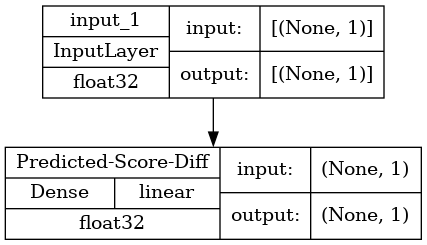

In [16]:
from tensorflow.keras.utils import plot_model

input_tensor = Input(shape=(1,), name='input_1')
output_layer = Dense(1, name='Predicted-Score-Diff')
output_tensor = output_layer(input_tensor)
model = Model(input_tensor, output_tensor)
plot_model(model,
           to_file='model.png',
           show_shapes=True,
           show_dtype=True,
           # show_layer_names=True, # default True, others False
           expand_nested=True,
           show_layer_activations=True)

In [17]:
# To plot a saved image
# img = plt.imread('model.png')
# plt.imshow(img)
# plt.axis('off')
# plt.show()

## Exercises

### Build a model

Once you've defined an input layer and an output layer, you can build a Keras model. The model object is how you tell Keras where the model starts and stops: where data comes in and where predictions come out.

In [18]:
input_tensor = Input(shape=(1,))
output_tensor = Dense(1)(input_tensor)
# Build the model
model = Model(input_tensor, output_tensor)

### Compile a model

The final step in creating a model is compiling it. Now that you've created a model, you have to compile it before you can fit it to data. This finalizes your model, freezes all its settings, and prepares it to meet some data!

During compilation, you specify the optimizer to use for fitting the model to the data, and a loss function. 'adam' is a good default optimizer to use, and will generally work well. Loss function depends on the problem at hand. Mean squared error is a common loss function and will optimize for predicting the mean, as is done in least squares regression.

Mean absolute error optimizes for the median and is used in quantile regression. For this dataset, 'mean_absolute_error' works pretty well, so use it as your loss function.

In [19]:
# Compile the model
model.compile(optimizer=f'adam', loss='mean_absolute_error')

### Visualize a model

Now that you've compiled the model, take a look a the result of your hard work! You can do this by looking at the model summary, as well as its plot.

The summary will tell you the names of the layers, as well as how many units they have and how many parameters are in the model.

The plot will show how the layers connect to each other.

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


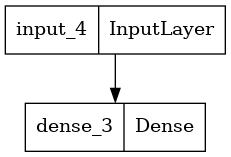

In [20]:
# Import the plotting function
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Summarize the model
model.summary()

# Plot the model
plot_model(model, to_file='model.png')

In [21]:
# # Display the image
# data = plt.imread('model.png')
# plt.imshow(data)
# plt.show()

# Fit and evaluate a model

## Basketball Data

Goal: Predict tournament outcomes  
Data available: team ratings from the tournament organizers

In [22]:
games_tourney.head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1
2,1985,9884,73,0,5,-4,59,63,0
3,1985,73,288,0,3,9,50,41,1
4,1985,3920,410,0,1,-9,54,63,0


Input:
* Seed difference - one number: -15 to +15
* Seed range from 1-16
* Highest difference is 16-1 = +15
* Lowest difference is 1-16 = -15

Output:
* Score difference - one number: -50 to +50

## Seed difference
* Seed difference: 15
    * Team 1:16
    * Team 2:1
* Seed difference: -15
    * Team 1:1
    * Team 2:16

A seed difference of positive 15 means that team 1 has a seed of 16 and is playing a team of seed of 1.

This means team 1 is likely (though not certain) to lose.

A seed difference of negative 15 means that team 1 has a seed of 1 and is playing a team of seed of 16.

This means team 1 is likely (though not certain) to win.

So a positive seed difference is usually predictive of a negative score difference, and a negative seed difference is usually predictive of a positive score difference. 

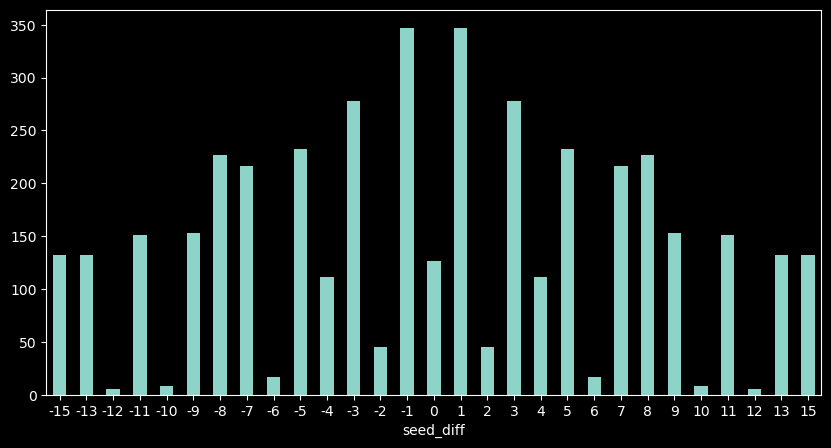

In [23]:
_=games_tourney.groupby('seed_diff')['seed_diff'].count().plot.bar(rot=0, figsize=(10,5))

## Score difference
* Score difference: -9
    * Team 1: 41
    * Team 2: 50
* Score difference: 6
    * Team 1: 61
    * Team 2: 55

Our target variable is the game's score difference and ranges from about negative 50 to positive 50.

This means you have games where team 1 lost by 50 points and games where they won by 50 points.

<AxesSubplot:xlabel='score_diff'>

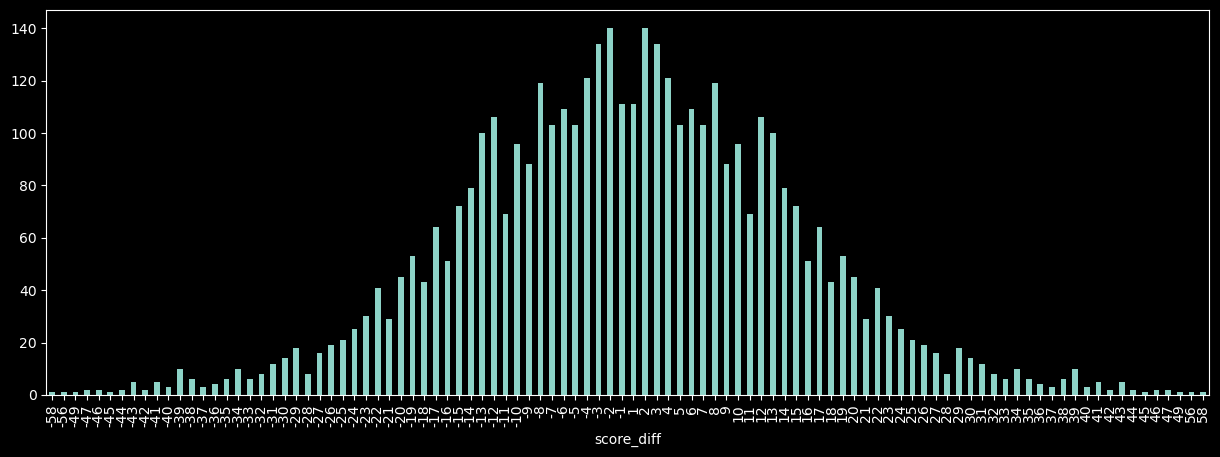

In [24]:
games_tourney.groupby('score_diff')['score_diff'].count().plot.bar(figsize=(15,5))

Note that both the regular season and the tournament datasets have 2 rows per game, where the second row has the opposite signs of the first row.

In other words, for a given game where the first team won, there is also a row in the dataset where team_1 and team_2 are swapped, and the first team lost.

In [25]:
games_season.loc[(games_season.season==1985) &
                 (((games_season.team_1==3745) & (games_season.team_2==6664))
                  |
                  ((games_season.team_1==6664) & (games_season.team_2==3745)))]

,season,team_1,team_2,home,score_diff,score_1,score_2,won
0,1985,3745,6664,0,17,81,64,1
199,1985,3745,6664,1,3,73,70,1
156089,1985,6664,3745,1,-17,64,81,0
156288,1985,6664,3745,0,-3,70,73,0


In [26]:
games_tourney

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1
2,1985,9884,73,0,5,-4,59,63,0
3,1985,73,288,0,3,9,50,41,1
4,1985,3920,410,0,1,-9,54,63,0
...,...,...,...,...,...,...,...,...,...
4229,2017,10120,10696,0,-1,-10,74,84,0
4230,2017,320,10818,0,9,-2,71,73,0
4231,2017,2910,10818,0,8,-25,66,91,0
4232,2017,3300,10818,0,10,24,83,59,1


In [27]:
games_tourney.loc[(games_tourney.season==1985) &
                 (((games_tourney.team_1==288) & (games_tourney.team_2==73))
                  |
                  ((games_tourney.team_1==73) & (games_tourney.team_2==288)))]

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
3,1985,73,288,0,3,9,50,41,1


## Build the model

Here is the model from lessons 1 and 2, defined in a single code chunk. This is a very basic keras regression model, with one input and one output. You could use this model for any regression problem with a single predictor and a single outcome.

In [28]:
input_tensor = Input(shape=(1,))
output_tensor = Dense(1)(input_tensor)
model = Model(input_tensor, output_tensor)
model.compile(optimizer='adam', loss='mae')

## Fit the model

In [29]:
model.fit(games_tourney['seed_diff'],
          games_tourney['score_diff'],
          batch_size=64,
          validation_split=.20,
          verbose=True)

53/53 [==============================] - 1s 2ms/step - loss: 9.4272 - val_loss: 9.2398


## Evaluate the model

In [30]:
model.evaluate(games_tourney['seed_diff'],
               games_tourney['score_diff'])

133/133 [==============================] - 0s 469us/step - loss: 9.3617


9.36170768737793

## Exercises

### Fit the model to the tournament basketball data

Now that the model is compiled, you are ready to fit it to some data!

In this exercise, you'll use a dataset of scores from US College Basketball tournament games. Each row of the dataset has the team ids: team_1 and team_2, as integers. It also has the seed difference between the teams (seeds are assigned by the tournament committee and represent a ranking of how strong the teams are) and the score difference of the game (e.g. if team_1 wins by 5 points, the score difference is 5).

To fit the model, you provide a matrix of X variables (in this case one column: the seed difference) and a matrix of Y variables (in this case one column: the score difference).

The games_tourney DataFrame along with the compiled model object is available in your workspace.

In [31]:
from sklearn.model_selection import train_test_split
games_tourney_train, games_tourney_test = train_test_split(games_tourney[['seed_diff', 'score_diff']], test_size=0.2)

In [32]:
# Now fit the model
model.fit(games_tourney_train['seed_diff'], games_tourney_train['score_diff'],
          epochs=1,
          batch_size=128,
          validation_split=.1,
          verbose=True)

24/24 [==============================] - 0s 2ms/step - loss: 9.3917 - val_loss: 9.4022


### Evaluate the model on a test set

After fitting the model, you can evaluate it on new data. You will give the model a new X matrix (also called test data), allow it to make predictions, and then compare to the known y variable (also called target data).

In this case, you'll use data from the post-season tournament to evaluate your model. The tournament games happen after the regular season games you used to train our model, and are therefore a good evaluation of how well your model performs out-of-sample.

The games_tourney_test DataFrame along with the fitted model object is available in your workspace.

In [33]:
# Evaluate the model on the test data
print(model.evaluate(games_tourney_test['seed_diff'], games_tourney_test['score_diff'], verbose=False))

9.153529167175293
